# Python Grundlagen 3

## Lernziele
* Verstehen, wie Module in Python funktionieren und Module importieren, um die von ihnen bereitgestellten Funktionen nutzbar zu machen.
* Daten mit Hilfe der third party library `pandas` einlesen, analysieren und filtern können.
* Daten mit Hilfe der third party library `seaborn` visualisieren können.

## Module

### Was sind Module?

Python organisiert Code in *Modulen*.
Ein Modul ist nichts anderes als eine Datei mit der Endung `.py`.

Module dienen dazu,

* Große Projekte in mehrere kleinere und damit überschaubare Dateien zu organisieren. Dabei werden (logisch) zusammen gehörige Code-Teile (z.B. Funktionen und Variablen) zusammen in einer Datei (einem *Modul*) gespeichert.
* Code besser wiederverwendbar zu machen, da Module selektiv in neuen Code *importiert* werden können.

Kleine Skripte kann man ohne weiteres in eine einzige Datei packen.
Sobald ein Programm aber mehr als ein paar hundert Zeilen hat, empfiehlt es
sich, den Code auf mehrere Module aufzuteilen, auch weil der Code dadurch
einfacher zu pflegen und zu testen ist.

### Module müssen importiert werden
Damit ein Modul im eigenen Programm verwendet werden kann, muss das Modul zuerst importiert werden:

~~~
import <Modulname>
~~~
    
Danach steht das Modul mit der dort definierten Funktionalität zur Verfügung.

### Die Standard-Bibliothek

Nicht nur der eigene Programmcode lässt sich in Modulen organisieren, auch
fremder Code wird in Modulen verteilt. Jede Python Installation kommt mit der sog. "Standard-Bibliothek" (standard library). Sie enthält eine Reihe von Modulen, die uns immer zur Verfügung stehen.  

Das in der Standard-Bibliothek enthaltene Modul `random` stellt eine Reihe von Zufalls-Funktionen bereit. Damit wir diese verwenden können, müssen wir das Modul zuerst importieren:

In [2]:
import random

Danach können wir uns beispielsweise mit der Funktion <tt>randint()</tt> eine zufällige Ganzzahl generieren lassen:

In [6]:
random.randint(0, 100)

32

### Module und Namensräume
Im letzten Beispiel haben wir nicht irgendeine Funktion mit dem Namen `randint` verwendet, sondern genau die, die vom Modul `random` bereit gestellt wird.

Module strukturieren daher nicht nur den Code, sondern bilden auch *Namensräume*, wodurch verhindert wird, dass sich beispielsweise zwei in unterschiedlichen Modulen definierte, gleichnamige Funktionen gegenseitig überlagern.

Den Namensraum bildet dabei einfach der Name des Moduls. Im obigen Beispiel also <tt>random</tt>.

### Namensräume umdefinieren
Manche Namensraumnamen sind sehr lange und es ist daher mühsam, diese immer einzutippen. Deshalb besteht die Möglichkeit, einem Modul einen eigenen Namen zuzuweisen. Dies geschieht, wenn wir das Modul importieren. Den neuen Namen des Moduls weisen wir mit den Wörtchen <tt>as</tt> zu:

In [7]:
import random as rnd

In [8]:
rnd.randint(0, 100)


37

<font color='blue'><b>Übung Module</b></font>  
<font color='blue'>Ein weiteres sehr hilfreiches Modul aus der Standard-Bibliothek ist das Modul <tt>math</tt>, das grundlegende Mathematische Funktionen wie die Wurzelfunktion und Konstanten wie Pi bereitstellt.</font>
<ul class="outside">
<li><font color='blue'>Importieren Sie das Modul <tt>math</tt>.</font></li>
<li><font color='blue'>Schauen Sie in die <a href="https://docs.python.org/3/library/math.html">Dokumentation</a> des Moduls um die Wurzelfunktion (English: "square root") zu finden. </font></li>
<li><font color='blue'>Verwenden Sie die Wurzelfunktion, um die Wurzel der Zahl 2401 zu berechnen.</li>
<li><font color='blue'>Geben Sie die Zahl <tt>Pi</tt> aus dem <tt>math</tt> Modul aus.</li>
</ul>



In [ ]:
import math

### Module von Drittanbietern (third party libraries)

Eine große Stärke von Python liegt darin, dass sich um die Sprache ein riesiges Ökosystem von Entwickler:innen gebildet hat, die umfassende und qualitativ sehr hochwertige Bibliotheken für alle möglichen Anwendungsfälle geschrieben haben. Das maschinelle Lernen ist nur ein Beispiel dafür. Diese Module heißen "third party libraries".

Gleich wie Module aus der Standard-Bibliothek müssen wir diese Module importieren. Im Unterschied zur Standard-Bibliothek müssen diese Module aber oftmals erst in unserer *Programmierumgebung* installiert werden, bevor wir Sie importieren können.

Die in diesem Kurs verwendeten third party libraries sind
* <tt>pandas</tt> zum Umgang mit Datensätzen
* <tt>seaborn</tt> zur Visualisierung von Daten
* <tt>scikit-learn</tt> für machine learning Algorithmen

Dankenswerterweise hat die Google Colab Umgebung all diese Module schon vorinstalliert und wir müssen nichts weiter tun (außer sie zu importieren) um sie zu verwenden.

In [ ]:
# "pd" ist die kanonische Abkürzung für pandas
import pandas as pd

# "sns" ist die kanonische Abkürzung für seaborn
import seaborn as sns

# Das Modul "scikit-learn" ist unter dem Kurznamen
# "sklearn" zu importieren
import sklearn


Wenn wir versuchen ein Modul zu importieren, das noch nicht installiert ist, führt das zu einem Fehler:

In [12]:
import datasets

ModuleNotFoundError: No module named 'datasets'

Wir können Module wie unten stehend installieren. **Achtung** das Rufzeichen am Anfang ist wichtig.

So installierte Module in Google Colab sind allerdings nicht persistent. Das heißt, wenn wir die Colab Umgebung schließen ist das installierte Modul wieder weg und bei der nächsten Sitzung muss es neu installiert werden.

In [ ]:
! pip install datasets

In [14]:
import datasets

## Mit Daten umgehen

Die third party library <tt>pandas</tt> ist unser Hauptwerkzeug, um mit Datensätzen umzugehen. Sie hilft dabei, Datensätze zu laden und zu transformieren, und wird auch standardmäßig von Funktionen für das maschinelle Lernen verarbeitet.

### DataFrames

Im untenstehenden Code erstellen wir uns "zu Fuß" eine Tabelle – ein sogenanntes <tt>DataFrame</tt> mit zwei Spalten: Namen und Alter. Im Normalfall werden wir DataFrames aus einer Datei *einlesen* oder Datensätze verwenden, die von <tt>pandas</tt> oder anderen Bibliotheken als Beispiele vorgehalten werden.

In [ ]:
# importiere Pandas unter dem Kürzel "pd"
import pandas as pd

# wir erstellen eine Tabelle zum Testen, die Namen
# (Strings) und Alter (Zahlen) enthält

# zuerst erstellen wir die Liste "namen" und
# die Liste "alter"
namen = ['tim','olaf','nina','andrea','jana','miro']
alter = [31, 52, 14, 46, 28, 3]

# dann erstellen wir die Tabelle "personen"
# (ein DataFrame) und übergeben die beiden
# Listen als Spalten der Tabelle
personen = pd.DataFrame({'name':namen, 'alter':alter})

# schließlich zeigen wir die ersten sechs Einträge
# der Tabelle an
personen.head(6)

**Hinweis**: um das <tt>DataFrame</tt> zu erstellen, haben wir eine Datenstruktur verwendet, die wir noch nicht kennen gelernt haben: das "Wörterbuch" (English: dictionary). Diese Datenstruktur wird durch geschwungene Klammern <tt>{ }</tt> gekenntzeichnet und besteht aus Paaren von "Schlüsseln" und "Werten" (keys und values) die jeweils durch einen Doppelpunkt verbunden sind:

<tt>
{  
'name':namen,  
'alter':alter  
}
</tt>

Mehr dazu finden Sie in der [Dokumentation zu dictionaries](https://docs.python.org/3/tutorial/datastructures.html).

### Deskriptive Statistik

Wir können auf einzelne Spalten des <tt>DataFrame</tt> zugreifen, indem wir die Spaltennamen verwenden:

In [ ]:
personen['name']

In [ ]:
personen['alter']

Wir können uns auch anzeigen lassen, welche Spalten überhaupt in dem <tt>DataFrame</tt> vorhanden sind:

In [ ]:
personen.columns

Auch die Anzahl der Zeilen können wir uns mit Hilfe der <tt>len()</tt> Funktion ausgeben lassen.

In [ ]:
len(personen)

<tt>DataFrames</tt> liefern schon viel praktische Funktionalität zum Umgang mit Daten mit. Wir können uns z.B. den Mittelwert einer Spalte einfach ausrechnen lassen:

In [ ]:
personen['alter'].mean()

Auch eine umfassende Beschreibung der in einer Spalte enthaltenen Information können wir uns einfach liefern lassen:

In [ ]:
personen['alter'].describe()

### Daten einlesen

Um existierende Datensätze einzulesen, verwenden wir Funktion <tt>read_csv()</tt> von <tt>pandas</tt>. Praktischerweise funktioniert das auch für Datensätze, die nicht lokal gespeichert sind sondern auf die wir über eine Internetadresse (URL) zugreifen können:

In [ ]:
# die URL der Daten – Sie können diese auch in Ihren Browser eingeben, um die
# daten Anzusehen bzw. herunterzuladen. Bei dem Datensatz handelt es sich um
# Infektions- und Todeszahlen in verschiedenen Ländern während der COVID Pandemie
daten_url = "https://github.com/owid/covid-19-data/raw/master/public/data/jhu/full_data.csv"

# wir lesen dbie Daten ein und speichern den Datensatz in einer Variablen "rohdaten"
rohdaten = pd.read_csv(daten_url)

# da uns nur einige der Spalten interessieren, "filtern" wir den Datensatz und
# behalten nur die für uns relevanten Spalten
interessante_spalten = ['location', 'date', 'new_cases', 'new_deaths']
daten_COVID = rohdaten[interessante_spalten]

# die "head()" Funktion gibt uns als Default die ersten 5 Einträge des
# Datensatzes aus
daten_COVID.head()

,location,date,new_cases,new_deaths
0,Afghanistan,2020-02-24,5.0,NaN
1,Afghanistan,2020-02-25,0.0,NaN
2,Afghanistan,2020-02-26,0.0,NaN
3,Afghanistan,2020-02-27,0.0,NaN
4,Afghanistan,2020-02-28,0.0,NaN


**Hinweis**: wenn in einer Zelle <tt>NaN</tt> steht bedeutet das, dass es hier keinen Wert gibt (fehlender Wert).

<font color='blue'><b>Übung Daten - 1</b></font>  
<font color='blue'>In der Zelle unten laden wir einen oft verwendeten Beispieldatensatz der Informationen zu den Passagier:innen der Titanic enthält. Für diesen Datensatz:</font>
<ul class="outside">
<li><font color='blue'>Finden Sie heraus, welche Spalten der Datensatz hat.</font></li>
<li><font color='blue'>Finden Sie heraus, wie viele Zeilen der Datensatz hat.</font></li>
<li><font color='blue'>Was ist das mittlere Alter der Passagier:innen (Spalte <tt>age</tt>)?</font></li>
<li><font color='blue'>Was ist der niedrigste und höchste Ticketpreis (Spalte <tt>fare</tt>)? <b>Hinweis</b>: statt der Funktion <tt>mean()</tt> für den Mittelwert wie oben können Sie <tt>min()</tt> und <tt>max</tt> verwenden.</font></li>
<li><font color='blue'>Wie viele verschiedene Klassen (Spalte <tt>class</tt>) gab es auf der Titanic? <b>Hinweis:</b> der Befehl <tt>data[spaltenname].unique()</tt> gibt eine Liste der distinkten Einträge in einer Spalte zurück.</font></li>
</ul>




In [ ]:
import seaborn
daten_titanic = seaborn.load_dataset("titanic")

### DataFrames filtern

Eine Methode, <tt>DataFrames</tt> zu filtern haben wir schon kennen gelernt: die Auswahl von bestimmten Spalten.

Oft sind wir aber eher daran interessiert, gewisse *Zeilen* auszuwählen. Dies können wir erreichen, indem wir Zeilen mit Hilfe einer *Maske* ausschließen. Wir erinnern uns an das <tt>DataFrame</tt> mit den Namen und dem Alter von Personen von vorhin:

In [ ]:
personen.head(6)

,name,alter
0,tim,31
1,olaf,52
2,nina,14
3,andrea,46
4,jana,28
5,miro,3


Wir können nun *Wahrheitswerte* (siehe das [Notebook](https://colab.research.google.com/drive/16jp0vxpbKs_0KXr9NUd8MLdnNdUWLocp?usp=sharing#scrollTo=b_Qcdul4vgQw) zu Python Grundlagen von letztem Mal, Kapitel "Der Datentyp Bool") verwenden, um einzelne Zeilen einzuschließen (<tt>True</tt>) oder auszuschließen (<tt>False</tt>). Um die Maske zu konstruieren, erstellen wir eine Liste von Wahrheitswerten:

In [ ]:
# hier konstruieren wir die Maske
maske = [False, True, False, True, False, True]

# wir können die Maske jetzt benutzen, um nur gewisse
# Zeilen im DataFrame auszuwählen:
personen[maske]

<font color='blue'><b>Übung Daten - 2</b></font>  
<font color='blue'>Modifizieren Sie die Maske um sich andere Zeilen ausgeben zu lassen – z.B. nur die ersten oder letzten beiden.</font>

In [ ]:
# natürlich können wir die so "gefilterte" Tabelle
# auch in einer neuen Variable speichern
gefilterte_personen = personen[maske]
gefilterte_personen.head()

Als nächsten Schritt erzeugen wir  die Maske automatisch. Wir möchten nur Einträge von Personen behalten, die älter als 30 Jahre sind. Das fragen wir mit Hilfe des "größer" Operators `>` ab:

In [ ]:
personen['alter'] >= 30

In [ ]:
# diese Maske speichern wir wieder in einer Variablen
maske_alt = personen['alter'] >= 30

# und filtern die Tabelle mit Hilfe der Maske
alte_personen = personen[maske_alt]
alte_personen.head()

Angenommen, wir wollen nicht nur eine Altersuntergrenze von 30 Jahren sondern auch eine Altersobergrenze von 50 Jahren für unseren Filter festlegen. Wie können wir das umsetzen?

### Exkurs: Bedingungen verknüpfen

Python kennt die folgenden Operatoren um zwei oder mehr Bedingungen logisch miteinander zu verknüpfen:

`&` – beide Bedingungen müssen wahr sein

In [ ]:
True & True

`|` – mindestens eine Bedingung muss wahr sein

In [ ]:
True | True

In [ ]:
True | False

In [ ]:
False | True

<font color='blue'><b>Übung Daten - 3</b></font>  
<font color='blue'>Finden Sie einen <tt>|</tt>-Austruck, der <tt>False</tt> liefert.</font>

Darüber hinaus gibt es noch den Operator `not` der den Wahrheitswehrt umkehrt (aus `True` wird `False` und umgekehrt).

In [ ]:
not True

In [ ]:
not False

### Komplexere Filter

Dieses Wissen können wir nun verwenden, um einen Filter zu konstruieren, der zwei Bedingungen gleichzeitig überprüft:

In [ ]:
maske = (personen['alter'] > 30) & (personen['alter'] < 50)
maske

,alter
0,True
1,False
2,False
3,True
4,False
5,False


**Hinweis**: beachten Sie die Klammern um die logischen Ausdrücke. Diese sind wichtig um die Reihenfolge der Auswertung der Ausdrücke zu gewährleisten: von links nach rechts zuerst die Ausdrücke innerhalb der Klammern und dann dazwischen.

In [ ]:
mittelalte_personen = personen[maske]
mittelalte_personen.head()

Wir können natürlich auch verschiedene Spalten in solchen Filtern kombinieren. Hier ein Beispiel mit dem Titanic-Datensatz, in dem wir alle männlichen Passagiere der zweiten Klasse herausfiltern:

In [ ]:
maske = (daten_titanic['sex'] == 'male') & (daten_titanic['class'] == 'Second')
maenner_zweite_klasse = daten_titanic[maske]
maenner_zweite_klasse.head()

Alle logischen Operatoren (siehe [Notebook](https://colab.research.google.com/drive/16jp0vxpbKs_0KXr9NUd8MLdnNdUWLocp?usp=sharing#scrollTo=b_Qcdul4vgQw) zu Python Grundlagen &rarr; Kapitel "Operatoren" können in solchen Filtern zum Einsatz kommen und es können beliebig viele Bedingungen miteinander verknüpft werden.

## Daten visualisieren

Daten zu visualisieren hilft uns dabei zu verstehen, was für Informationen in einem Datensatz enthalten sind. Je nachdem ob wir es mit numerischen oder kategorischen Daten zu tun haben (siehe auch [Vorlesung zu Datentypen](https://janalasser.at/lectures/MC_KI/VO2_4_daten/)) brauchen wir unterschiedliche Typen von Diagrammen um Daten darzustellen.

Für den Rest des Kurses werden wir vier Typen von Diagrammen brauchen:
* **Histogram**: stellt einen eindimensionalen Datensatz mit numerischen Datenpunkten dar.
* **Balkendiagram** (bar plot): stellt einen zweidimensionalen Datensatz mit einer numerischen und einer kategorischen Dimension dar.
* **Streudiagram** (scatter plot): stellt einen zweidimensionalen Datensatz mit zwei numerischen Dimensionen dar.
* **Liniendiagram** (line plot): stellt einen zweidimensionalen Datensatz mit zwei numerischen Dimensionen dar, und wird verwendet, wenn wir Änderungen in einer der beiden Dimensionen betonen wollen. Ein klassisches Beispiel ist die Änderung einer Variablen über die Zeit.

Zum Visualisieren von Daten in diesem Kurs werden wir die third party library <tt>[seaborn](https://seaborn.pydata.org/index.html)</tt> verwenden. Seaborn bietet ein relativ abstraktes Interface mit Funktionen zum erstellen von Diagrammen an und setzt dabei auf der mächtigen Bibliothek <tt>[matplotlib](https://matplotlib.org/)</tt> auf. Für die allermeisten Anwendungsfälle reicht <tt>seaborn</tt> – möchte man sich aber mit den Details von Abbildungen spielen kann es hilfreich sein, sich mit <tt>matplotlib</tt> zu beschäftigen und auf Funktionalitäten dieser Bibliothek zurückzugreifen.

In [ ]:
# import der Bibliothek seaborn zum erstellen von
# Abbildungen (plotten) von Daten
import seaborn as sns

### Histogram

Alle Funktionen in <tt>seaborn</tt> folgen dem gleichen Schema:
* der Funktionsname legt die Art der Abbildung (z.B. Histogram oder bar plot) fest.
* der erste Parameter der Funktion ist der Datensatz, der dargestellt werden soll.
* je nachdem ob die Abbildung ein- oder zweidimensional ist, wird mit den Parametern `x` und `y` festgelegt, welche Spalte des Datensatzes für die jeweilige Dimension verwendet werden soll.
* weitere Optionale Parameter können dafür benutzt werden, das Verhalten oder Aussehen der Abbildung anzupassen.

<Axes: xlabel='age', ylabel='Count'>

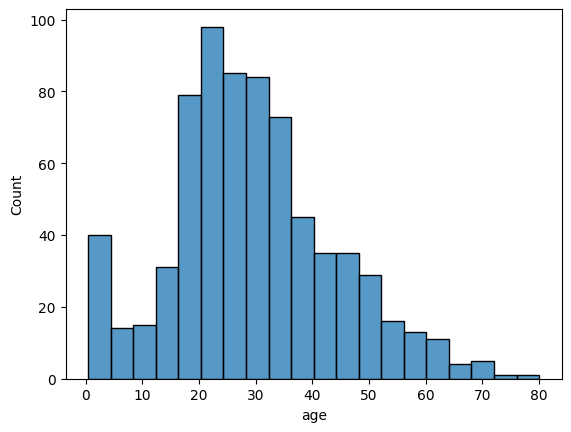

In [ ]:
# da Histogramme nur eindimensionale Daten darstellen,
# müssen wir der Funktion histplot() nur den Spaltennamen
# für die x-Dimension mitteilen
sns.histplot(daten_titanic, x="age")

In [ ]:
?sns.histplot

<Axes: xlabel='age', ylabel='Count'>

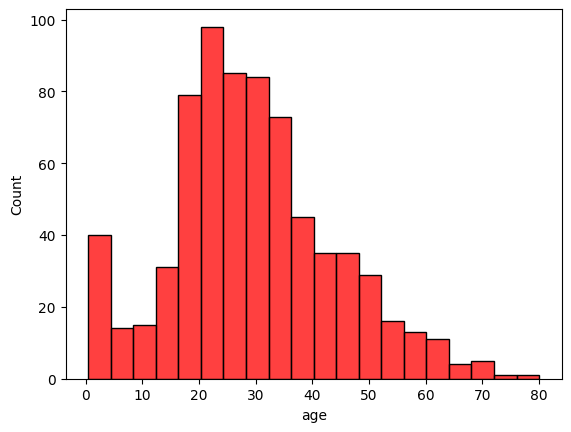

In [ ]:
sns.histplot(daten_titanic, x="age", color="red")

### Balkendiagram

Bei Balkendiagrammen müssen wir zwei Dimensionsn festlegen,
wobei eine davon kategorische und die andere numerische Werte enthalten muss.

<Axes: xlabel='class', ylabel='fare'>

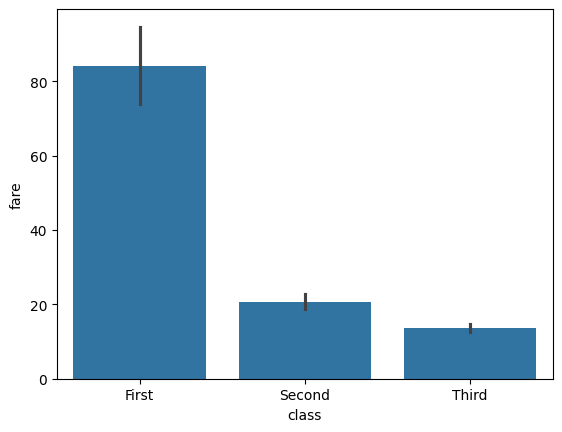

In [ ]:
sns.barplot(data=daten_titanic, x="class", y="fare")

<font color='blue'><b>Übung Visulaisierung - 1</b></font>  
<ul class="outside">
<li><font color='blue'>Probieren Sie aus was passiert, wenn Sie in dem obenstehenden Code für ein Balkendiagram die x- und y-Dimension vertauschen.</font></li>
<li><font color='blue'>Verwenden Sie den optionalen Parameter <tt>hue=sex</tt> um die Balken auch noch nach dem Geschlecht der Passagier:innen zu unterscheiden.</font></li>

### Streudiagramm

Streudiagramme verwenden wir, wenn wir zweidimensionale numerische Daten darstellen möchten. Das bietet sich z.B. an, wenn wir einen Zusammenhang zwischen zwei Dimensionen vermuten oder wenn wir Ausreißer identifizieren möchten. Auch hier müssen wir wieder die x- und y-Dimension angeben:

<Axes: xlabel='age', ylabel='fare'>

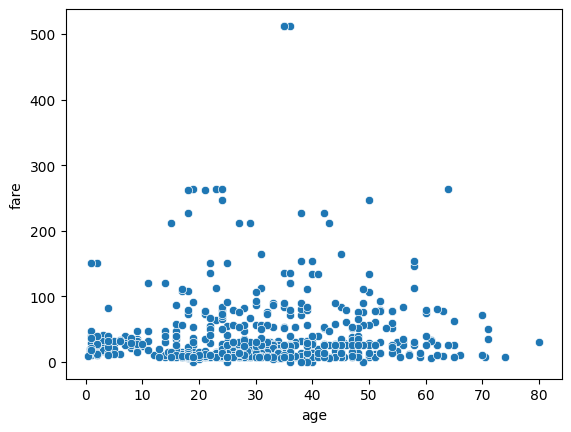

In [ ]:
sns.scatterplot(data=daten_titanic, x="age", y="fare")

### Liniendiagram

Um das Liniendiagram sinnvoll zu demonstrieren, brauchen wir Daten mit einer Zeitdimension. Die COVID Infektionszahlen von früher bieten sich an.

Wir lesen die Daten noch einmal ein. Dabei ist es wichtig darauf zu achten, dass die Spalte in der das Datum steht auch als Datum interpretiert (geparsed) wird (`parse_dates=['date']`).

In [ ]:
daten_url = "https://github.com/owid/covid-19-data/raw/master/public/data/jhu/full_data.csv"
daten_COVID = pd.read_csv(daten_url, parse_dates=['date'])

# wir interessieren uns nur für die Daten aus Österreich, deswegen filtern wir
# den Datensatz mit den Fallzahlen erst einmal entsprechend.
maske = daten_COVID['location'] == 'Austria'
daten_AUT = daten_COVID[maske]

Für das Liniendiagram müssen wir wieder zwei Dimensionen angeben, wobei die y-Dimension diejenige ist, in der wir die Variable darstellen deren Änderungen uns interessieren. Die x-Dimension ist die Variable, entlang der die Veränderungen stattfinden – in diesem Beispiel die Zeit.

<Axes: xlabel='date', ylabel='new_cases'>

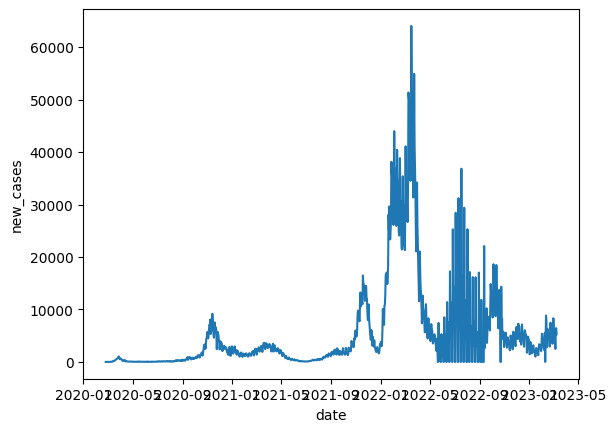

In [ ]:
sns.lineplot(data=daten_AUT, x="date", y="new_cases")

## Weiterführende Materialien
* **Module**: [Notebook zu Modulen](https://github.com/gvasold/gdp/blob/main/02-funktionen-module-venvs/03-module.ipynb) aus dem Kurs "Grundlagen der Programmierung".
* **Standard-Bibliothek und Installation von Modulen**: [Notebook zur Standard-Bibliothek und dem Python Package Index](https://github.com/gvasold/gdp/blob/main/02-funktionen-module-venvs/04-existierende_module.ipynb) aus dem Kurs "Grundlagen der Programmierung".
* **Pandas**: [Youtube Playlist](https://www.youtube.com/playlist?list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS) mit Videos zum Umgang mit Pandas. Die grundlegenden Konzepte werden in Videos 1 bis 6 vermittelt.
* **Seaborn**: [Einführung in Seaborn](https://seaborn.pydata.org/tutorial/introduction) mit vielen Beispielen für schöne Abbildungen.
* **Matplotlib**: [Youtube Video](https://www.youtube.com/watch?v=wB9C0Mz9gSo) mit einer Umfassenden Einführung in Matplotlib.

## Hausaufgaben

Die Hausaufgaben für diesen Kursteil finden sich in [diesem Notebook](https://colab.research.google.com/drive/1dwyhXduzfPSCbyWOVawsxOGGfkGoKOO-#scrollTo=XW9eF6ph8DGt).

## Quelle und Lizenz

Das vorliegende Notebook besteht zu Teilen aus inhalten des Kurses [Grundlagen der Programmierung](https://github.com/gvasold/gdp/tree/main) von [Gunter Vasold](https://online.uni-graz.at/kfu_online/visitenkarte.show_vcard?pPersonenGruppe=3&pPersonenId=036149BE966ADC08). Modifikationen wurden von Jana Lasser vorgenommen.

Das Notebook kann unter den Bedingungen der Lizenz [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0) verwendet, modifiziert und weiterverbreitet werden.

